C:\Users\choco\AppData\Local\Temp\ipykernel_23188\3055552915.py:34: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



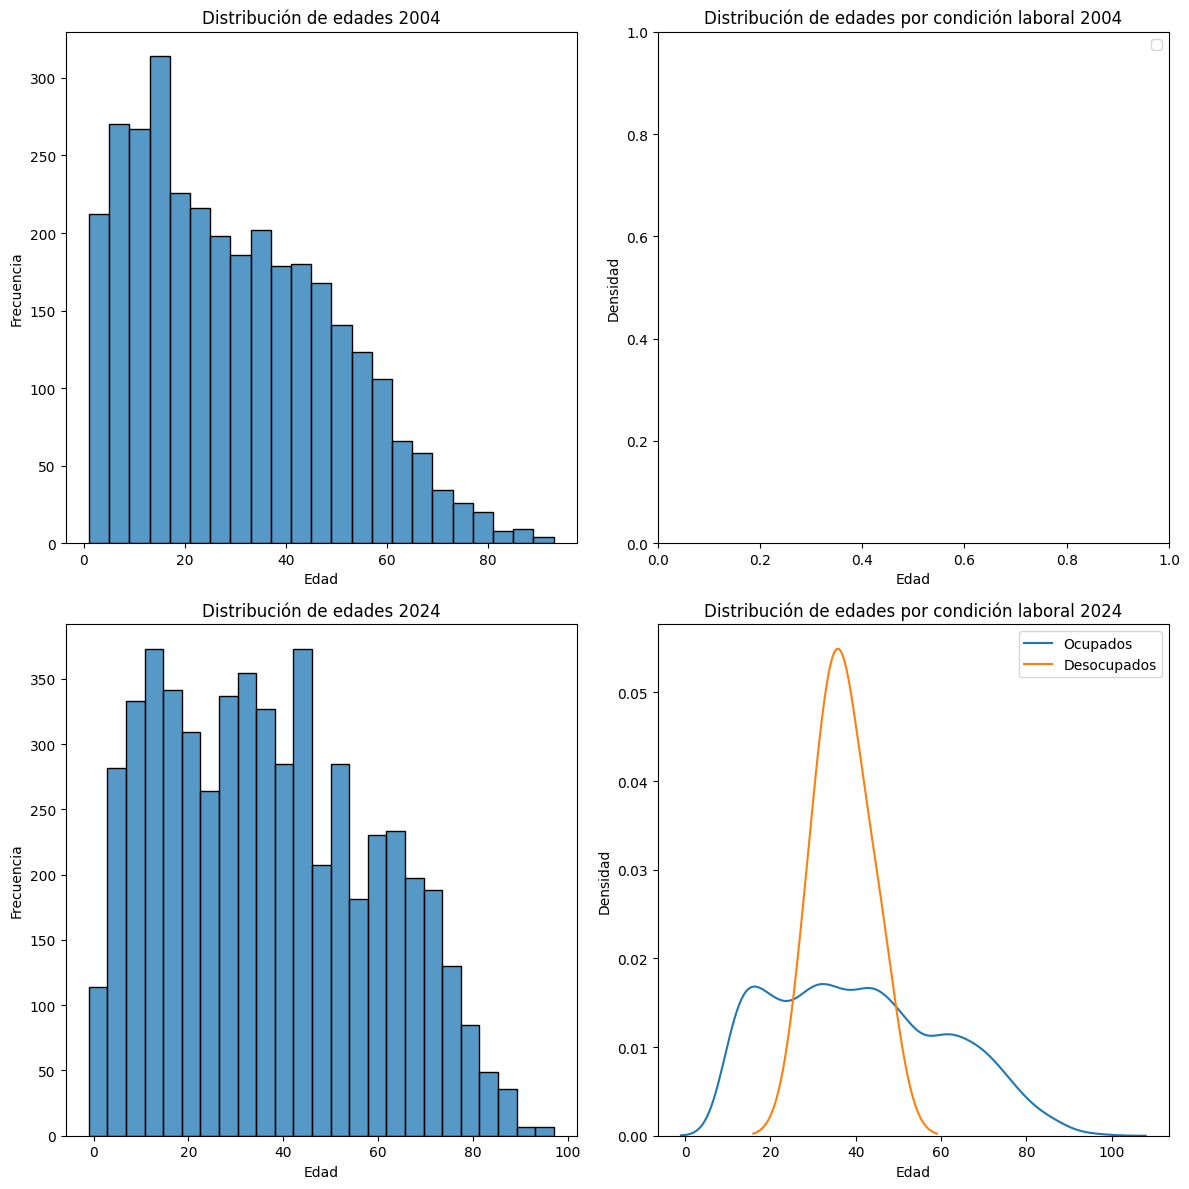

In [30]:
# ejercicio 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


datos1 = pd.read_stata("C:\\Users\\choco\\Downloads\\patagonia_t104.dta")
patagonia1 = datos1[datos1['region'].astype(str).str.contains('patagónica', case=False, na=False)].iloc[:, 1:]
datos2 = pd.read_excel("C:\\Users\\choco\\Downloads\\usu_individual_T124.xlsx")
patagonia2 = datos2[datos2['REGION'] == 44].iloc[:, 1:]


patagonia1['ch06'] = pd.to_numeric(patagonia1['ch06'], errors='coerce')
patagonia2['CH06'] = pd.to_numeric(patagonia2['CH06'], errors='coerce')


patagonia1['edad2'] = patagonia1['ch06'] ** 2
patagonia2['edad2'] = patagonia2['CH06'] ** 2


fig, axs = plt.subplots(2, 2, figsize=(12, 12))


sns.histplot(patagonia1['ch06'].dropna(), ax=axs[0, 0], kde=False)
axs[0, 0].set_title('Distribución de edades 2004')
axs[0, 0].set_xlabel('Edad')
axs[0, 0].set_ylabel('Frecuencia')


sns.kdeplot(patagonia1[patagonia1['h15'] == 1]['ch06'].dropna(), ax=axs[0, 1], label='Ocupados')
sns.kdeplot(patagonia1[patagonia1['h15'] == 2]['ch06'].dropna(), ax=axs[0, 1], label='Desocupados')
axs[0, 1].set_title('Distribución de edades por condición laboral 2004')
axs[0, 1].set_xlabel('Edad')
axs[0, 1].set_ylabel('Densidad')
axs[0, 1].legend()


sns.histplot(patagonia2['CH06'].dropna(), ax=axs[1, 0], kde=False)
axs[1, 0].set_title('Distribución de edades 2024')
axs[1, 0].set_xlabel('Edad')
axs[1, 0].set_ylabel('Frecuencia')


sns.kdeplot(patagonia2[patagonia2['H15'] == 1]['CH06'].dropna(), ax=axs[1, 1], label='Ocupados')
sns.kdeplot(patagonia2[patagonia2['H15'] == 2]['CH06'].dropna(), ax=axs[1, 1], label='Desocupados')
axs[1, 1].set_title('Distribución de edades por condición laboral 2024')
axs[1, 1].set_xlabel('Edad')
axs[1, 1].set_ylabel('Densidad')
axs[1, 1].legend()


plt.tight_layout()
plt.show()


Estadísticas descriptivas para 2004:
Edad:
count    3213.000000
mean       29.414566
std        19.365060
min         1.000000
25%        13.000000
50%        26.000000
75%        43.000000
max        93.000000
Name: ch06, dtype: float64

Educación:
count    3264.000000
mean        1.049939
std         4.863659
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       111.000000
Name: educ, dtype: float64

Estadísticas descriptivas para 2024:
Edad:
count    5527.000000
mean       36.800253
std        22.030921
min        -1.000000
25%        18.000000
50%        35.000000
75%        53.000000
max        97.000000
Name: CH06, dtype: float64

Educación:
count    5527.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: educ, dtype: float64


C:\Users\choco\AppData\Local\Temp\ipykernel_23188\2788168994.py:119: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



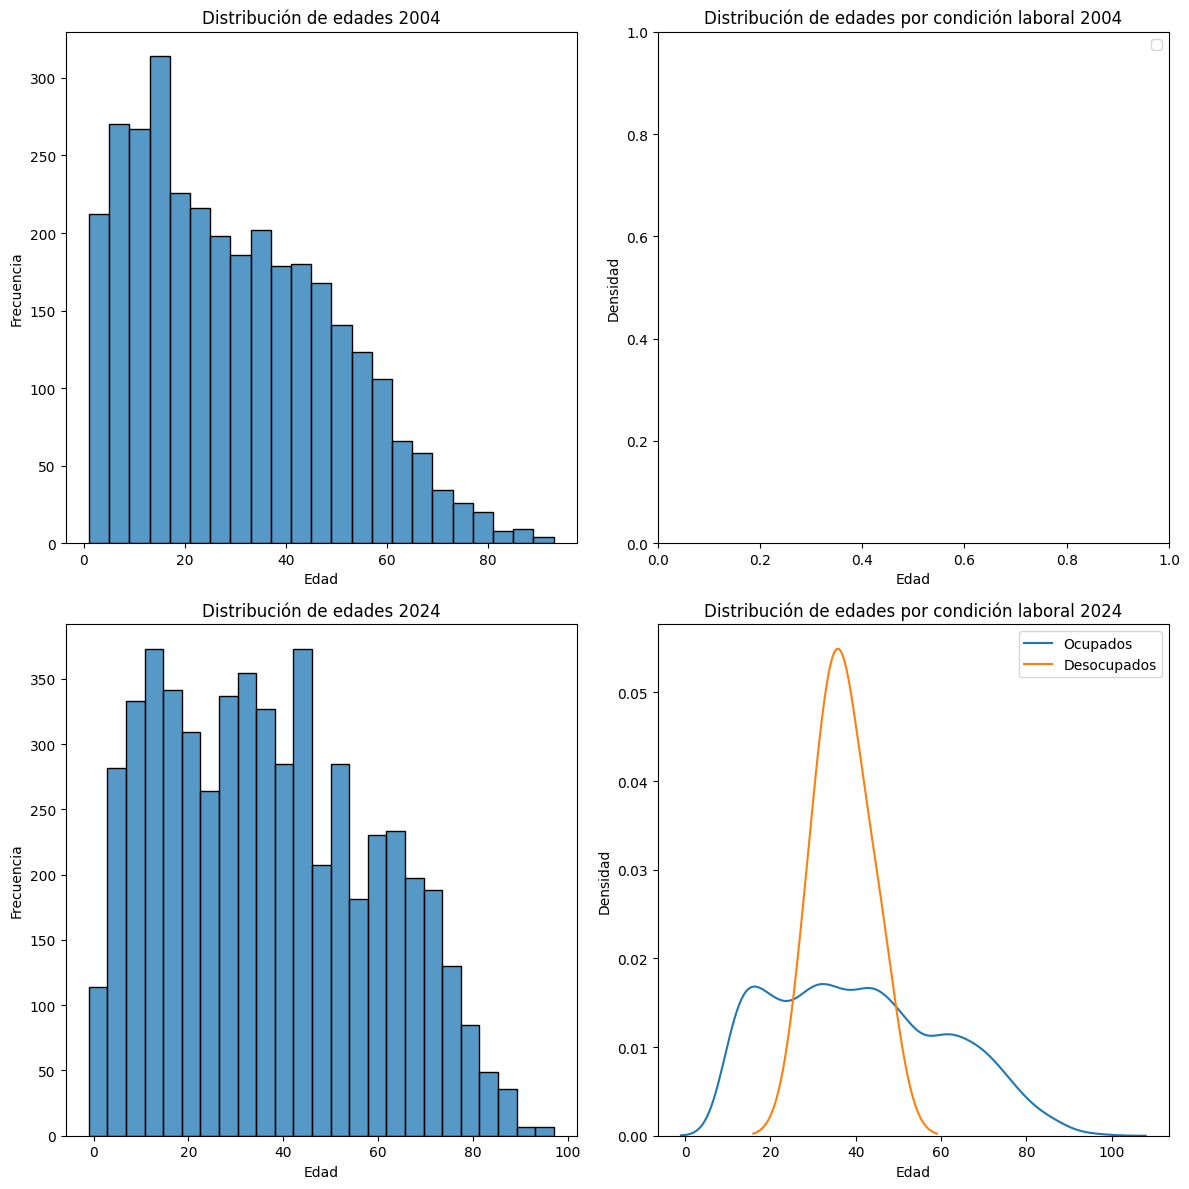

In [56]:
#ejrcicio 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


datos1 = pd.read_stata("C:\\Users\\choco\\Downloads\\patagonia_t104.dta")
patagonia1 = datos1[datos1['region'].astype(str).str.contains('patagónica', case=False, na=False)].iloc[:, 1:]
datos2 = pd.read_excel("C:\\Users\\choco\\Downloads\\usu_individual_T124.xlsx")
patagonia2 = datos2[datos2['REGION'] == 44].iloc[:, 1:]


patagonia1['ch06'] = pd.to_numeric(patagonia1['ch06'], errors='coerce')
patagonia2['CH06'] = pd.to_numeric(patagonia2['CH06'], errors='coerce')


patagonia1['edad2'] = patagonia1['ch06'] ** 2
patagonia2['edad2'] = patagonia2['CH06'] ** 2


def calcular_educacion(row):
    nivel = row['CH12']
    finalizo = row['CH13']
    ultimo_ano = row['CH14']
    educ = 0
    
    if pd.isna(nivel) or pd.isna(finalizo) or pd.isna(ultimo_ano):
        return educ

    try:
        ultimo_ano = int(ultimo_ano)
    except ValueError:
        return educ

    if nivel == 'Primaria':
        educ = ultimo_ano
    elif nivel == 'Secundaria':
        educ = 6 + ultimo_ano
    elif nivel == 'Terciario':
        educ = 12 + ultimo_ano
    elif nivel == 'Universitario':
        if ultimo_ano == 1:
            educ = 13
        elif ultimo_ano == 2:
            educ = 14
        elif ultimo_ano == 3:
            educ = 15
        elif ultimo_ano == 4:
            educ = 16
        elif ultimo_ano == 5:
            educ = 17
    return educ

def calcular_educacion_2004(row):
    nivel = row['ch12']
    finalizo = row['ch13']
    ultimo_ano = row['ch14']
    educ = 0
    
    if pd.isna(nivel) or pd.isna(finalizo) or pd.isna(ultimo_ano):
        return educ

    try:
        ultimo_ano = int(ultimo_ano)
    except ValueError:
        return educ

    if nivel == 'Primaria':
        educ = ultimo_ano
    elif nivel == 'Secundaria':
        educ = 6 + ultimo_ano
    elif nivel == 'Terciario':
        educ = 12 + ultimo_ano
    elif nivel == 'Universitario':
        if ultimo_ano == 1:
            educ = 13
        elif ultimo_ano == 2:
            educ = 14
        elif ultimo_ano == 3:
            educ = 15
        elif ultimo_ano == 4:
            educ = 16
        elif ultimo_ano == 5:
            educ = 17
    return educ


patagonia1['educ'] = patagonia1.apply(calcular_educacion_2004, axis=1)
patagonia2['educ'] = patagonia2.apply(calcular_educacion, axis=1)


print("Estadísticas descriptivas para 2004:")
print("Edad:")
print(patagonia1['ch06'].describe())
print("\nEducación:")
print(patagonia1['educ'].describe())

print("\nEstadísticas descriptivas para 2024:")
print("Edad:")
print(patagonia2['CH06'].describe())
print("\nEducación:")
print(patagonia2['educ'].describe())


fig, axs = plt.subplots(2, 2, figsize=(12, 12))


sns.histplot(patagonia1['ch06'].dropna(), ax=axs[0, 0], kde=False)
axs[0, 0].set_title('Distribución de edades 2004')
axs[0, 0].set_xlabel('Edad')
axs[0, 0].set_ylabel('Frecuencia')



sns.kdeplot(patagonia1[patagonia1['h15'] == 1]['ch06'].dropna(), ax=axs[0, 1], label='Ocupados')
sns.kdeplot(patagonia1[patagonia1['h15'] == 2]['ch06'].dropna(), ax=axs[0, 1], label='Desocupados')
axs[0, 1].set_title('Distribución de edades por condición laboral 2004')
axs[0, 1].set_xlabel('Edad')
axs[0, 1].set_ylabel('Densidad')
axs[0, 1].legend()


sns.histplot(patagonia2['CH06'].dropna(), ax=axs[1, 0], kde=False)
axs[1, 0].set_title('Distribución de edades 2024')
axs[1, 0].set_xlabel('Edad')
axs[1, 0].set_ylabel('Frecuencia')


sns.kdeplot(patagonia2[patagonia2['H15'] == 1]['CH06'].dropna(), ax=axs[1, 1], label='Ocupados')
sns.kdeplot(patagonia2[patagonia2['H15'] == 2]['CH06'].dropna(), ax=axs[1, 1], label='Desocupados')
axs[1, 1].set_title('Distribución de edades por condición laboral 2024')
axs[1, 1].set_xlabel('Edad')
axs[1, 1].set_ylabel('Densidad')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

Estadísticas descriptivas para 2004:
Edad:
count    3213.000000
mean       29.414566
std        19.365060
min         1.000000
25%        13.000000
50%        26.000000
75%        43.000000
max        93.000000
Name: ch06, dtype: float64

Educación:
count    3264.000000
mean        1.049939
std         4.863659
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       111.000000
Name: educ, dtype: float64
count    3264.000000
mean        1.049939
std         4.863659
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       111.000000
Name: educ, dtype: float64

Salario Semanal:
count    3264.000000
mean       49.653608
std        98.594445
min         0.000000
25%         0.000000
50%         0.000000
75%        73.125000
max      1235.000000
Name: salario_semanal, dtype: float64

Estadísticas descriptivas para 2024:
Edad:
count    5527.000000
mean       36.800253
std        22.030921
min        -1.000000
25%     

C:\Users\choco\AppData\Local\Temp\ipykernel_23188\380447971.py:130: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



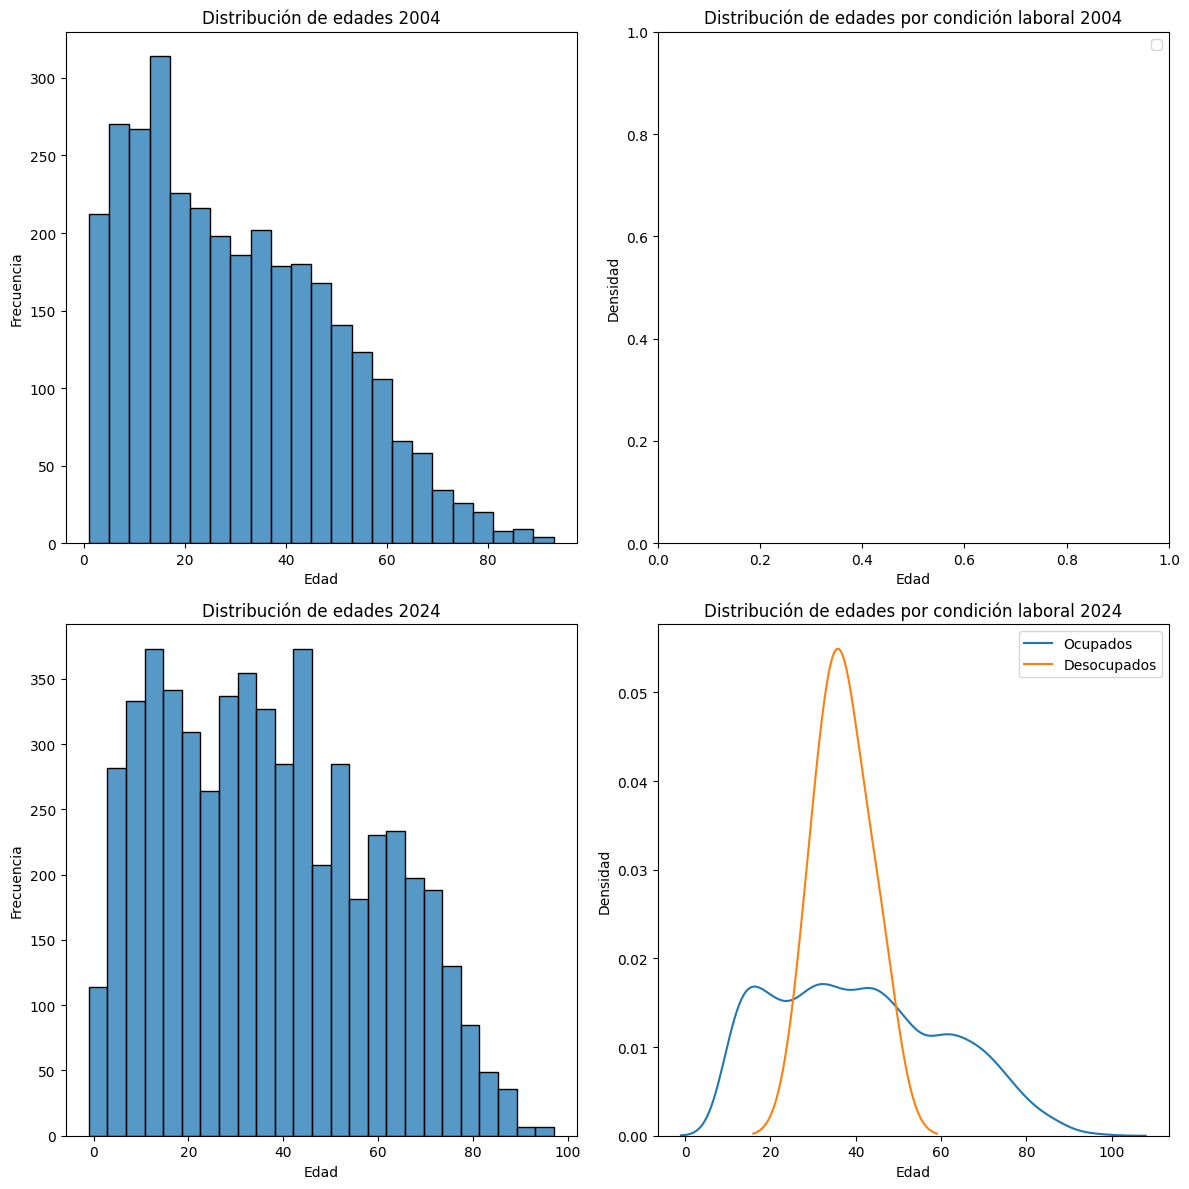

In [64]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


datos1 = pd.read_stata("C:\\Users\\choco\\Downloads\\patagonia_t104.dta")
patagonia1 = datos1[datos1['region'].astype(str).str.contains('patagónica', case=False, na=False)].iloc[:, 1:]
datos2 = pd.read_excel("C:\\Users\\choco\\Downloads\\usu_individual_T124.xlsx")
patagonia2 = datos2[datos2['REGION'] == 44].iloc[:, 1:]


patagonia1['ch06'] = pd.to_numeric(patagonia1['ch06'], errors='coerce')
patagonia2['CH06'] = pd.to_numeric(patagonia2['CH06'], errors='coerce')


patagonia1['edad2'] = patagonia1['ch06'] ** 2
patagonia2['edad2'] = patagonia2['CH06'] ** 2


def calcular_educacion(row):
    nivel = row['CH12']
    finalizo = row['CH13']
    ultimo_ano = row['CH14']
    educ = 0
    if pd.isna(nivel) or pd.isna(finalizo) or pd.isna(ultimo_ano):
        return educ
    try:
        ultimo_ano = int(ultimo_ano)
    except ValueError:
        return educ
    if nivel == 'Primaria':
        educ = ultimo_ano
    elif nivel == 'Secundaria':
        educ = 6 + ultimo_ano
    elif nivel == 'Terciario':
        educ = 12 + ultimo_ano
    elif nivel == 'Universitario':
        if ultimo_ano == 1:
            educ = 13
        elif ultimo_ano == 2:
            educ = 14
        elif ultimo_ano == 3:
            educ = 15
        elif ultimo_ano == 4:
            educ = 16
        elif ultimo_ano == 5:
            educ = 17
    return educ

def calcular_educacion_2004(row):
    nivel = row['ch12']
    finalizo = row['ch13']
    ultimo_ano = row['ch14']
    educ = 0
    if pd.isna(nivel) or pd.isna(finalizo) or pd.isna(ultimo_ano):
        return educ
    try:
        ultimo_ano = int(ultimo_ano)
    except ValueError:
        return educ
    if nivel == 'Primaria':
        educ = ultimo_ano
    elif nivel == 'Secundaria':
        educ = 6 + ultimo_ano
    elif nivel == 'Terciario':
        educ = 12 + ultimo_ano
    elif nivel == 'Universitario':
        if ultimo_ano == 1:
            educ = 13
        elif ultimo_ano == 2:
            educ = 14
        elif ultimo_ano == 3:
            educ = 15
        elif ultimo_ano == 4:
            educ = 16
        elif ultimo_ano == 5:
            educ = 17
    return educ


patagonia1['educ'] = patagonia1.apply(calcular_educacion_2004, axis=1)
patagonia2['educ'] = patagonia2.apply(calcular_educacion, axis=1)


indice_conversion = 6.5
def calcular_salario_semanal(row, anio, columna_ingresos):
    ingresos = row[columna_ingresos]
    if pd.isna(ingresos):
        return None
    if anio == 2004:
        ingresos_convertidos = ingresos * indice_conversion
    else:
        ingresos_convertidos = ingresos
    salario_semanal = ingresos_convertidos / 40
    return salario_semanal


patagonia1['salario_semanal'] = patagonia1.apply(lambda row: calcular_salario_semanal(row, 2004, 'p21'), axis=1)
patagonia2['salario_semanal'] = patagonia2.apply(lambda row: calcular_salario_semanal(row, 2024, 'P21'), axis=1)


print("Estadísticas descriptivas para 2004:")
print("Edad:")
print(patagonia1['ch06'].describe())
print("\nEducación:")
print(patagonia1['educ'].describe())
print(patagonia1['educ'].describe())
print("\nSalario Semanal:")
print(patagonia1['salario_semanal'].describe())

print("\nEstadísticas descriptivas para 2024:")
print("Edad:")
print(patagonia2['CH06'].describe())
print("\nEducación:")
print(patagonia2['educ'].describe())
print("\nSalario Semanal:")
print(patagonia2['salario_semanal'].describe())

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
sns.histplot(patagonia1['ch06'].dropna(), ax=axs[0, 0], kde=False)
axs[0, 0].set_title('Distribución de edades 2004')
axs[0, 0].set_xlabel('Edad')
axs[0, 0].set_ylabel('Frecuencia')

sns.kdeplot(patagonia1[patagonia1['h15'] == 1]['ch06'].dropna(), ax=axs[0, 1], label='Ocupados')
sns.kdeplot(patagonia1[patagonia1['h15'] == 2]['ch06'].dropna(), ax=axs[0, 1], label='Desocupados')
axs[0, 1].set_title('Distribución de edades por condición laboral 2004')
axs[0, 1].set_xlabel('Edad')
axs[0, 1].set_ylabel('Densidad')
axs[0, 1].legend()

sns.histplot(patagonia2['CH06'].dropna(), ax=axs[1, 0], kde=False)
axs[1, 0].set_title('Distribución de edades 2024')
axs[1, 0].set_xlabel('Edad')
axs[1, 0].set_ylabel('Frecuencia')

sns.kdeplot(patagonia2[patagonia2['H15'] == 1]['CH06'].dropna(), ax=axs[1, 1], label='Ocupados')
sns.kdeplot(patagonia2[patagonia2['H15'] == 2]['CH06'].dropna(), ax=axs[1, 1], label='Desocupados')
axs[1, 1].set_title('Distribución de edades por condición laboral 2024')
axs[1, 1].set_xlabel('Edad')
axs[1, 1].set_ylabel('Densidad')
axs[1, 1].legend()

plt.tight_layout()
plt.show()